In [160]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [161]:
print(df.columns)


Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


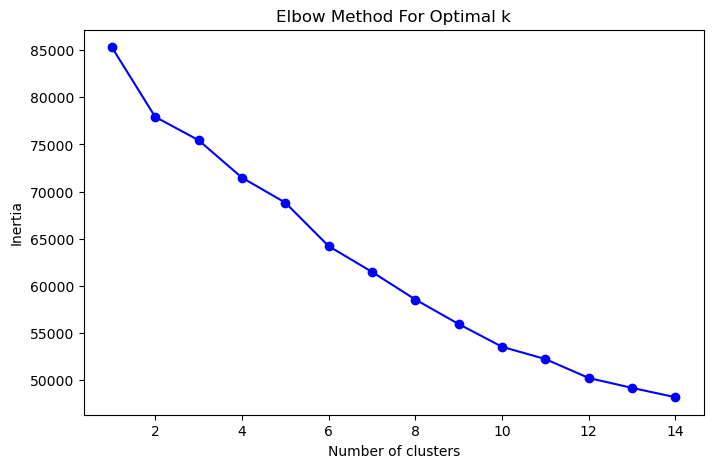

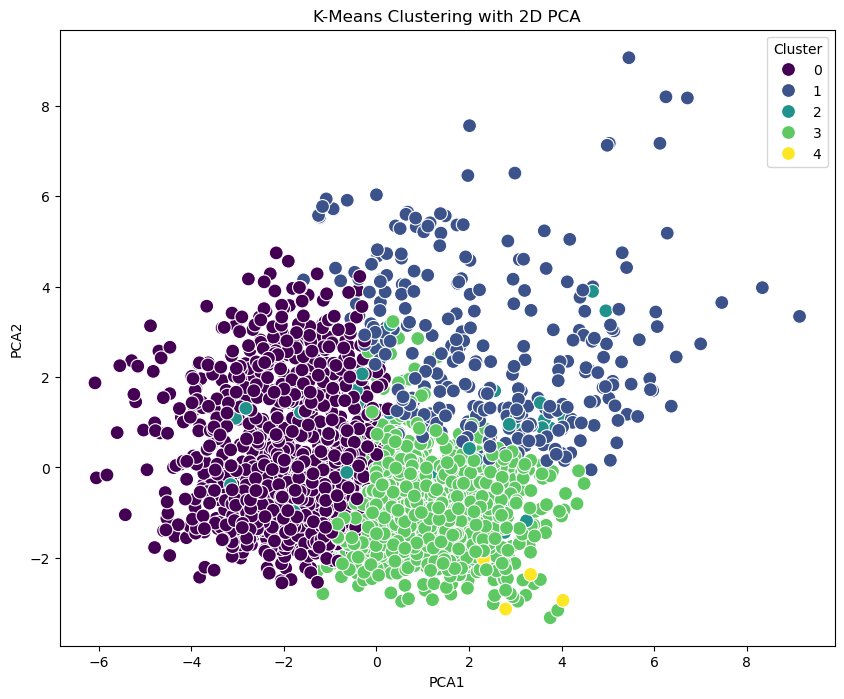

In [162]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns that are not useful for clustering
df_numeric = df.drop(columns=['Title'])

# Normalize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the Elbow Method, choose an optimal k (e.g., k=5)
optimal_k = 5

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters (for example, using the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], data=df, palette='viridis', s=100)
plt.title('K-Means Clustering with 2D PCA')
plt.show()



In [163]:
cluster_names = {
    0: 'Mainstream Genre Hits',
    1: 'Acclaimed Crowd-Pleasers',
    2: 'Modern Westerns/Crime',
    3: 'Cult/Arthouse Gems',
    4: 'Issue-Driven Docs'
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

I came up with cluster names by providing deepseek with the cluster_analysis and then using a iterativ process I reprompted deepseek with the clusters and a random movie selection

Issue Driven Docs and Modern Westerns/Crime does not provide new information since it just contains all Movies of Documentaries/News and Western respectivly

In [164]:


# Analyze the clusters
cluster_analysis = df.groupby('Cluster Name')[df_numeric.columns].mean()
cluster_analysis

,Is Series,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,IMDb Votes,Minimum Age,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
Cluster Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acclaimed Crowd-Pleasers,0.026756,3.971572,4.150502,7.728763,85.050167,76.187291,49.886288,90.411371,1.762395e+08,1.470801e+09,616194.260870,14.505017,0.418060,0.408027,0.030100,0.090301,0.110368,0.157191,0.000000,0.535117,0.060201,0.160535,0.040134,0.060201,0.016722,0.013378,0.177258,0.0,0.107023,0.347826,0.006689,0.311037,0.066890,0.0
Cult/Arthouse Gems,0.029358,4.330092,3.510092,7.129541,79.802752,69.190826,11.698165,21.792661,2.432258e+07,1.493230e+09,93756.849541,12.044037,0.107339,0.058716,0.031193,0.200000,0.259633,0.166055,0.067890,0.830275,0.045872,0.065138,0.102752,0.044954,0.066055,0.014679,0.080734,0.0,0.256881,0.033028,0.051376,0.213761,0.070642,0.0
Issue-Driven Docs,0.000000,5.400000,3.000000,7.575000,93.500000,77.750000,11.000000,24.000000,7.288442e+05,1.434629e+09,22434.000000,7.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Mainstream Genre Hits,0.010290,2.644528,3.263798,6.134238,45.176801,47.276894,3.378859,9.159027,7.189148e+07,1.465500e+09,129988.217025,13.577175,0.410664,0.315248,0.098223,0.011225,0.459308,0.187091,0.002806,0.279701,0.185220,0.231993,0.007484,0.166511,0.013096,0.030870,0.134705,0.0,0.181478,0.181478,0.025257,0.378859,0.015903,0.0
Modern Westerns/Crime,0.021277,3.965957,3.723404,7.114894,78.446809,69.297872,19.914894,50.148936,4.248967e+07,1.492941e+09,187938.489362,14.446809,0.446809,0.297872,0.042553,0.063830,0.191489,0.319149,0.000000,0.744681,0.063830,0.021277,0.063830,0.000000,0.000000,0.000000,0.042553,0.0,0.127660,0.063830,0.000000,0.297872,0.000000,1.0


In [165]:
print(df[['Title', 'Cluster Name']])

                                                  Title  \
0                                      Lets Fight Ghost   
1                                   HOW TO BUILD A GIRL   
2                                                 Joker   
3                                                     I   
4                                      Harrys Daughters   
5                                            The Closet   
6                                                 Alice   
7                                       Ordinary People   
8                                     Paths of the Soul   
9                                           Stand by Me   
10                                         Wonderstruck   
11                                The Girl on the Train   
12                                       Ride Your Wave   
13                                                  Red   
14                                               Burden   
15                                                 Love 

In [166]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.groupby('Cluster Name').apply(lambda x: x.sample(min(len(x), 10)))[['Title']]

/tmp/ipykernel_13702/2396723821.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Cluster Name').apply(lambda x: x.sample(min(len(x), 10)))[['Title']]


Title
Cluster Name                                                                    
Acclaimed Crowd-Pleasers 1888                                 The Social Network
                         647                                        Wonder Woman
                         2119                                          Gladiator
                         1247  Indiana Jones and the Kingdom of the Crystal S...
                         868                                               Tiger
                         2321                                       The Hangover
                         26                                              Im Home
                         1093                                            Ant-Man
                         143                                            Parasite
                         1035                                          Spotlight
Cult/Arthouse Gems       391                                 Sorry to Bother You
                         1499                               The Eye of the Storm
                         2377                                            Don Jon
                         535                                            Stronger
                         922                          The Umbrellas of Cherbourg
                         1867                                   The Untouchables
                         1734                    If I Want to Whistle, I Whistle
                         2125                                           Hot Fuzz
                         1643                                           The Debt
                         2352                                      Even the Rain
Issue-Driven Docs        2419                                          Blackfish
                         2443                                         The Square
                         1143                                        Cartel Land
                         1629                                      Red Obsession
Mainstream Genre Hits    407                                     Pitch Perfect 3
                         2030                                   [Rec] 3: Genesis
                         605                      Ice Age: Dawn of the Dinosaurs
                         1553                                               Noah
                         192                                  Prince of Darkness
                         911                                            Bad Moms
                         2376                                      Gods Not Dead
                         2344                                         Happy Feet
                         302                             The Curse of La Llorona
                         454               Truth or Dare: Extended Directors Cut
Modern Westerns/Crime    1776                               A Fistful of Dollars
                         2061                                              Rango
                         288                           The Ballad of Lefty Brown
                         1354                                       The Homesman
                         2384                                   Casa de mi Padre
                         1968                                   Django Unchained
                         1147                                          Slow West
                         29                    Marlina the Murderer in Four Acts
                         620                                            The Hero
                         1706                       The Good, the Bad, the Weird

In [167]:

df.sort_values(by='Cluster',ascending=True)[['Title', 'Cluster Name']]

,Title,Cluster Name
1746,Beverly Hills Cop,Mainstream Genre Hits
1732,Fullmetal Alchemist: The Sacred Star of Milos,Mainstream Genre Hits
921,The Angry Birds Movie,Mainstream Genre Hits
927,Gods Not Dead 2,Mainstream Genre Hits
897,Superman IV: The Quest for Peace,Mainstream Genre Hits
901,I Know What You Did Last Summer,Mainstream Genre Hits
1766,District 13,Mainstream Genre Hits
1769,Ponyo,Mainstream Genre Hits
1771,Flawless,Mainstream Genre Hits
1744,The Croods,Mainstream Genre Hits
